# What will we do in this project?

In this project we will analyze what drives the choice of recruiters to call back candidates and we will also try to understand if having an ethnic name lowers the probability of being called back.

To do this we will use **Chi-square automatic interaction detection (CHAID)**.

CHAID is a decision tree technique used to discover the relationship between variables. 

We can do both drive analysis to understand what matters the most and segmentation. CHAID is different from other segmentation techniques which have only independent variables while CHAID also has a dependent variable.

In practice, CHAID is often used in the context of direct marketing to select groups of consumers to predict how their responses to some variables affect other variables.

## Benefits of using CHAID

### Importance Ranking:
CHAID figures out which variables matter more by doing significance tests

### Segmented Driver Analysis
CHAID will segment the population and perform driver analysis for each segment

### Interpretability
CHAID provides easy to read graphs

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from CHAID import Tree
import seaborn as sns
import matplotlib.pyplot as plt
import orca
import plotly
import plotly.graph_objects as go
import graphviz



In [2]:
# Import the data
df = pd.read_csv('resumenames.csv')

In [3]:
df.head()

,Unnamed: 0,name,gender,ethnicity,quality,call,city,jobs,experience,honors,...,minimum,equal,wanted,requirements,reqexp,reqcomm,reqeduc,reqcomp,reqorg,industry
0,1,Allison,female,cauc,low,no,chicago,2,6,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
1,2,Kristen,female,cauc,high,no,chicago,3,6,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
2,3,Lakisha,female,afam,low,no,chicago,1,6,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
3,4,Latonya,female,afam,high,no,chicago,4,6,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
4,5,Carrie,female,cauc,high,no,chicago,3,22,no,...,some,yes,secretary,yes,yes,no,no,yes,yes,health/education/social services


## How to read the data?

- name:
factor indicating applicant's first name.
- gender:
factor indicating gender.
- ethnicity:
factor indicating ethnicity (i.e., Caucasian-sounding vs. African-American sounding first name).
- quality:
factor indicating quality of resume.
- call:
factor. Was the applicant called back?
- city:
factor indicating city: Boston or Chicago.
- jobs:
number of jobs listed on resume.
- experience:
number of years of work experience on the resume.
- honors:
factor. Did the resume mention some honors?
- volunteer:
factor. Did the resume mention some volunteering experience?
- military:
factor. Does the applicant have military experience?
- holes:
factor. Does the resume have some employment holes?
- school:
factor. Does the resume mention some work experience while at school?
- email:
factor. Was the e-mail address on the applicant's resume?
- computer:
factor. Does the resume mention some computer skills?
- special:
factor. Does the resume mention some special skills?
- college:
factor. Does the applicant have a college degree or more?
- minimum:
factor indicating minimum experience requirement of the employer.
- equal:
factor. Is the employer EOE (equal opportunity employment)?
- wanted:
factor indicating type of position wanted by employer.
- requirements:
factor. Does the ad mention some requirement for the job?
- reqexp:
factor. Does the ad mention some experience requirement?
- reqcomm:
factor. Does the ad mention some communication skills requirement?
- reqeduc:
factor. Does the ad mention some educational requirement?
- reqcomp:
factor. Does the ad mention some computer skills requirement?
- reqorg:
factor. Does the ad mention some organizational skills requirement?
- industry:
factor indicating type of employer industry.

# How CHAID (Chi-square Automatic Interaction Detectors) works?

CHAID will use every predictor variable to split the sample based on this factor and performs a Chi-square test to check if  a statistically significant relationship between the factor and the response variable exists. If a statistically significant difference is observed then the most significant factor is used to make a split, which becomes the next branch in the tree.

The process repeats to find the predictor variable on each leaf that is most significantly related to the response, branch by branch, until no further factors are found to have a statistically significant effect on the response variable.



### Data Preparation

In [4]:
# remove name valiable
df = df.drop(columns=['Unnamed: 0','name'], axis=1)

### Transform numeric variables in categorical variables


In [5]:
# find unique value
df.nunique()

gender           2
ethnicity        2
quality          2
call             2
city             2
jobs             7
experience      26
honors           2
volunteer        2
military         2
holes            2
school           2
email            2
computer         2
special          2
college          2
minimum         13
equal            2
wanted           6
requirements     2
reqexp           2
reqcomm          2
reqeduc          2
reqcomp          2
reqorg           2
industry         7
dtype: int64

In [6]:
df.dtypes

gender          object
ethnicity       object
quality         object
call            object
city            object
jobs             int64
experience       int64
honors          object
volunteer       object
military        object
holes           object
school          object
email           object
computer        object
special         object
college         object
minimum         object
equal           object
wanted          object
requirements    object
reqexp          object
reqcomm         object
reqeduc         object
reqcomp         object
reqorg          object
industry        object
dtype: object

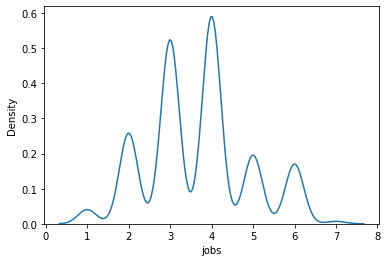

In [7]:
# trnsforming numeric variables in categorical variables
sns.kdeplot(x=df['jobs'])
plt.show()

In [8]:
#transforming job variable
df['jobs'] = pd.cut(x= df['jobs'], bins=[-1, 2.9, 4.9, 9], labels=[0,1,2])
df['jobs'] = pd.factorize(df['jobs'])[0]

In [9]:
df['jobs'].unique()

array([0, 1, 2], dtype=int64)

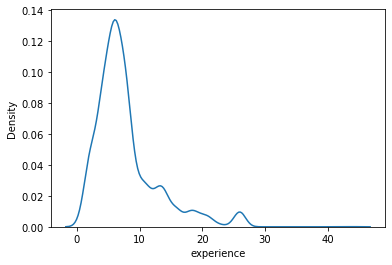

In [10]:
# trnsforming experience variables
sns.kdeplot(x=df['experience'])
plt.show()

In [11]:
df['experience'] = pd.qcut(x= df['experience'], q=3, labels=[0,1,2]) # using quantiles
df['experience'] = pd.factorize(df['experience'])[0]

In [12]:
# transform Minimum Variable
df['minimum'].value_counts()

none    2746
some    1064
2        356
3        331
5        163
1        142
10        18
7         12
8         10
0.5        8
4          8
6          8
0          4
Name: minimum, dtype: int64

In [13]:
minimum_dict = {'none': 0,
                          '0': 0,
                          '0.5': 0,
                          '1': 1,
                          '2': 1,
                          'some': 2,
                          '3': 2,
                          '4': 2,
                          '5': 3,
                          '6': 3,
                          '7': 3,
                          '8': 3,
                          '10': 3}


df['minimum'] = df['minimum'].replace(minimum_dict)

In [14]:

df['minimum'].value_counts()

0    2758
2    1403
1     498
3     211
Name: minimum, dtype: int64

### Creating dummies variables


In [15]:
df = pd.get_dummies(df, drop_first=True) # drop first column to avoid dummy variable trap 

In [16]:
df.head(1)

,jobs,experience,minimum,gender_male,ethnicity_cauc,quality_low,call_yes,city_chicago,honors_yes,volunteer_yes,...,reqcomm_yes,reqeduc_yes,reqcomp_yes,reqorg_yes,industry_finance/insurance/real estate,industry_health/education/social services,industry_manufacturing,industry_trade,industry_transport/communication,industry_unknown
0,0,0,3,0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


## Preparing data for CHAID

In [17]:
# get y name

y_name = df['call_yes'].name # will be our dependent variable

In [18]:
# get indipendent variables names
X_names = df.drop(columns=['call_yes'], axis=1).columns

In [19]:
print(X_names)
print(len(X_names))

Index(['jobs', 'experience', 'minimum', 'gender_male', 'ethnicity_cauc',
       'quality_low', 'city_chicago', 'honors_yes', 'volunteer_yes',
       'military_yes', 'holes_yes', 'school_yes', 'email_yes', 'computer_yes',
       'special_yes', 'college_yes', 'equal_yes', 'wanted_office support',
       'wanted_other', 'wanted_retail sales', 'wanted_secretary',
       'wanted_supervisor', 'requirements_yes', 'reqexp_yes', 'reqcomm_yes',
       'reqeduc_yes', 'reqcomp_yes', 'reqorg_yes',
       'industry_finance/insurance/real estate',
       'industry_health/education/social services', 'industry_manufacturing',
       'industry_trade', 'industry_transport/communication',
       'industry_unknown'],
      dtype='object')
34


## We can start to train and fit our model.

In [20]:
# creating a dictionary with the indipendent variables and if they are ordinal or not

X = dict(zip(X_names, ['ordinal']*3 + ['nominal']*31))
X

{'jobs': 'ordinal',
 'experience': 'ordinal',
 'minimum': 'ordinal',
 'gender_male': 'nominal',
 'ethnicity_cauc': 'nominal',
 'quality_low': 'nominal',
 'city_chicago': 'nominal',
 'honors_yes': 'nominal',
 'volunteer_yes': 'nominal',
 'military_yes': 'nominal',
 'holes_yes': 'nominal',
 'school_yes': 'nominal',
 'email_yes': 'nominal',
 'computer_yes': 'nominal',
 'special_yes': 'nominal',
 'college_yes': 'nominal',
 'equal_yes': 'nominal',
 'wanted_office support': 'nominal',
 'wanted_other': 'nominal',
 'wanted_retail sales': 'nominal',
 'wanted_secretary': 'nominal',
 'wanted_supervisor': 'nominal',
 'requirements_yes': 'nominal',
 'reqexp_yes': 'nominal',
 'reqcomm_yes': 'nominal',
 'reqeduc_yes': 'nominal',
 'reqcomp_yes': 'nominal',
 'reqorg_yes': 'nominal',
 'industry_finance/insurance/real estate': 'nominal',
 'industry_health/education/social services': 'nominal',
 'industry_manufacturing': 'nominal',
 'industry_trade': 'nominal',
 'industry_transport/communication': 'nomina

In [21]:
model = Tree.from_pandas_df(df, X, y_name, max_depth=3, min_child_node_size=250) 

In [22]:
model.print_tree()

([], {0: 4478.0, 1: 392.0}, (special_yes, p=9.09108860261878e-15, score=60.08363933760746, groups=[[0], [1]]), dof=1))
|-- ([0], {0: 3075.0, 1: 194.0}, (requirements_yes, p=0.0002718068476768014, score=13.25532368278205, groups=[[0], [1]]), dof=1))
|   |-- ([0], {0: 576.0, 1: 57.0}, (experience, p=0.003975225728095155, score=8.295096983690131, groups=[[0], [1, 2]]), dof=1))
|   |   |-- ([0], {0: 346.0, 1: 23.0}, <Invalid Chaid Split> - the max depth has been reached)
|   |   +-- ([1, 2], {0: 230.0, 1: 34.0}, <Invalid Chaid Split> - the max depth has been reached)
|   +-- ([1], {0: 2499.0, 1: 137.0}, (ethnicity_cauc, p=0.03903799830275106, score=4.2592132081738185, groups=[[0], [1]]), dof=1))
|       |-- ([0], {0: 1266.0, 1: 57.0}, <Invalid Chaid Split> - the max depth has been reached)
|       +-- ([1], {0: 1233.0, 1: 80.0}, <Invalid Chaid Split> - the max depth has been reached)
+-- ([1], {0: 1403.0, 1: 198.0}, (city_chicago, p=0.0003119135961753523, score=12.99746120113997, groups=[[

## How to read these results?

The CHAID model shows us that the most important predictor is special_yes, this means that **the candidates who have indicated some special skill in the resume have a high probability of being recalled.**

To answer our question whether having an ethnic name lowers the probability of being called back, the model shows us that if no special skill has been indicated and the job has requirements, **having a name that sounds Caucasian significantly increases the possibility of being recalled: in fact, 94% were called back.**


## Visualization

In [ ]:
# export a graphic rappresentation of the decision tree
model.to_tree()
model.render(path=None, view=False)